In [ ]:
!unzip '/content/drive/MyDrive/Chest X-ray images with three classes COVID-19, Normal, and Pneumonia.zip' -d /content/covid_data

Archive:  /content/drive/MyDrive/Chest X-ray images with three classes COVID-19, Normal, and Pneumonia.zip
  inflating: /content/covid_data/Chest X-ray images with three classes COVID-19, Normal, and Pneumonia/COVID-19 cases/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png  
  inflating: /content/covid_data/Chest X-ray images with three classes COVID-19, Normal, and Pneumonia/COVID-19 cases/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png  
  inflating: /content/covid_data/Chest X-ray images with three classes COVID-19, Normal, and Pneumonia/COVID-19 cases/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png  
  inflating: /content/covid_data/Chest X-ray images with three classes COVID-19, Normal, and Pneumonia/COVID-19 cases/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png  
  inflating: /content/covid_data/Chest X-ray images with three classes COVID-19, Normal, and Pneumonia/COVID-19 cases/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import *
from keras.layers import *
from numpy import argmax
from sklearn.metrics import accuracy_score,  confusion_matrix
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16

In [ ]:
data_dir = '/content/covid_data/Chest X-ray images with three classes COVID-19, Normal, and Pneumonia'

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(data_dir ,
                                                       validation_split =.2,
                                                       subset = 'validation',
                                                       seed= 123,
                                                       image_size=(224,224),
                                                       label_mode ='categorical'
                                                       )
train_set = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                        subset = 'training',
                                                        validation_split =.2,
                                                        seed= 123,
                                                        image_size=(224,224),
                                                        label_mode='categorical'
                                                        )

Found 603 files belonging to 3 classes.
Using 120 files for validation.
Found 603 files belonging to 3 classes.
Using 483 files for training.


In [ ]:
model = Sequential()
vgg16_model=vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))
vgg16_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
# Freeze all the layers

for layer in vgg16_model.layers[:]:

    layer.trainable = False

vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.add(vgg16_model)

model.add(Flatten(name='flatten'))

model.add(Dense(1024, activation='relu', name='fc1'))

model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax', name='output'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="sgd",
              metrics=['accuracy']
              )
model.fit(train_set,
          epochs=10,
          validation_data=test_set,
          # callbacks=tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
         )

Epoch 1/10
16/16 [==============================] - 9s 361ms/step - loss: 0.5951 - accuracy: 0.7723 - val_loss: 0.6526 - val_accuracy: 0.7500
Epoch 2/10
16/16 [==============================] - 8s 294ms/step - loss: 1.3451 - accuracy: 0.6977 - val_loss: 0.6896 - val_accuracy: 0.8583
Epoch 3/10
16/16 [==============================] - 9s 379ms/step - loss: 0.7185 - accuracy: 0.7226 - val_loss: 0.6480 - val_accuracy: 0.7750
Epoch 4/10
16/16 [==============================] - 7s 292ms/step - loss: 0.6423 - accuracy: 0.7453 - val_loss: 1.7763 - val_accuracy: 0.7583
Epoch 5/10
16/16 [==============================] - 8s 291ms/step - loss: 0.9578 - accuracy: 0.6998 - val_loss: 0.7009 - val_accuracy: 0.7667
Epoch 6/10
16/16 [==============================] - 9s 292ms/step - loss: 0.5786 - accuracy: 0.7474 - val_loss: 0.7533 - val_accuracy: 0.6917
Epoch 7/10
16/16 [==============================] - 8s 355ms/step - loss: 0.8447 - accuracy: 0.6542 - val_loss: 0.7156 - val_accuracy: 0.7167
Epoch 

In [ ]:
score = model.evaluate(test_set)

4/4 [==============================] - 2s 130ms/step - loss: 0.5058 - accuracy: 0.7667


In [ ]:
# prediction of our data
y_pred=model.predict(test_set)
y_pred.shape

4/4 [==============================] - 2s 140ms/step


(120, 3)

In [ ]:
y_pred1=argmax(y_pred,axis=1)
y_pred1.shape

(120,)

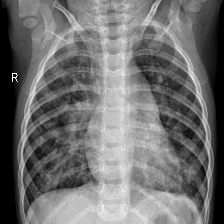

In [ ]:
img =load_img('/content/covid_data/Chest X-ray images with three classes COVID-19, Normal, and Pneumonia/Pneumonia/person15_virus_46.jpeg',target_size =(224,224))
img

In [ ]:
img1 =img_to_array(img)
img1.shape

(224, 224, 3)

In [ ]:
first_element = next(iter(train_set))
# Extract the image from the first element
image = first_element[0][0]
# Normalize the image by dividing by 255
normalized_image = image / 255
img1 = img1/255
img1 =np.expand_dims(normalized_image, axis =0)
img1.shape

(1, 224, 224, 3)

In [ ]:
np.argmax(model.predict(img1),axis=1)

1/1 [==============================] - 0s 140ms/step


array([0])